# Applying a Decision Tree model for regression

In [9]:
from tqdm.notebook import tqdm

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading the logaritmic dataset

In [10]:
DATA = pd.read_csv("../Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_racePctAsian,log_blackPerCap,log_indianPerCap,log_PctEmplProfServ,log_PctOccupMgmtProf,log_NumImmig,log_PctImmigRec5,log_PctRecImmig8,log_PctHousOwnOcc,log_PctHousNoPhone,log_OwnOccHiQuart,log_RentHighQ,log_PctForeignBorn,log_PopDens,log_PctUsePubTrans,log_racepctblack,log_racePctWhite,log_racePctHisp,log_ViolentCrimesPerPop
0,0.049218,0.120574,0.103804,0.149219,0.181844,0.012837,0.103804,0.033424,0.181844,0.056905,0.071882,0.139879,0.049218,0.100371,0.079181,0.008600,0.278754,0.068186,0.079181
1,0.161368,0.123852,0.064458,0.060698,0.133539,0.004321,0.209515,0.096910,0.093422,0.064458,0.082785,0.146128,0.082785,0.049218,0.161368,0.049218,0.240549,0.029384,0.222716
2,0.068186,0.103804,0.029384,0.110590,0.120574,0.000000,0.025306,0.017033,0.149219,0.167317,0.064458,0.103804,0.056905,0.082785,0.008600,0.173186,0.193125,0.017033,0.155336
3,0.049218,0.143015,0.064458,0.161368,0.143015,0.008600,0.079181,0.045323,0.292256,0.045323,0.075547,0.247973,0.075547,0.143015,0.107210,0.301030,0.033424,0.041393,0.049218
4,0.037426,0.107210,0.000000,0.139879,0.164353,0.000000,0.029384,0.017033,0.271842,0.021189,0.113943,0.139879,0.045323,0.037426,0.008600,0.008600,0.290035,0.021189,0.012837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.049218,0.103804,0.000000,0.225309,0.230449,0.004321,0.149219,0.071882,0.190332,0.029384,0.103804,0.149219,0.086360,0.107210,0.021189,0.041393,0.271842,0.064458,0.037426
1990,0.262451,0.100371,0.071882,0.149219,0.093422,0.021189,0.209515,0.212188,0.086360,0.068186,0.133539,0.206826,0.184691,0.136721,0.079181,0.164353,0.107210,0.120574,0.161368
1991,0.017033,0.096910,0.075547,0.146128,0.120574,0.025306,0.068186,0.045323,0.136721,0.117271,0.110590,0.143015,0.096910,0.120574,0.071882,0.096910,0.227887,0.096910,0.089905
1992,0.086360,0.110590,0.079181,0.195900,0.170262,0.025306,0.164353,0.149219,0.123852,0.041393,0.167317,0.243038,0.161368,0.139879,0.123852,0.025306,0.271842,0.041393,0.075547


## Creating train and test sets for model fitting
70% and 30% of the whole date were considered for the trainining and testing datasets.

In [11]:
X = DATA.drop(["log_ViolentCrimesPerPop"],axis=1).copy()
Y = DATA.log_ViolentCrimesPerPop

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.size, X_test.size

(25110, 10782)

## Finding the optimum Decision Tree Regressor
The optimal Decision Tree will be defined as the one that maximizes R2-score by stablishing the minimum number of samples to split a node and to create a leaf. The depth of the trees won't be constant.

In [12]:
Results_Nums_SplitLeaf = []
MaxR2 = 0.0
Range_Leaf_Split = range(1, 21)

ProgressBar = tqdm(total=(len(Range_Leaf_Split)**2))

for numSplit in Range_Leaf_Split:
    for numLeaf in Range_Leaf_Split:
        DT_Regressor = DecisionTreeRegressor(min_samples_split=numSplit, min_samples_leaf=numLeaf,
                                            random_state=42)
        DT_Regressor.fit(X_train, Y_train)
        Y_hat = DT_Regressor.predict(X_test)

        R2_Score = r2_score(Y_test, Y_hat)
            
        ProgressBar.update(1)            
        if R2_Score > MaxR2:
            MaxR2 = R2_Score
            Opt_SampleSplit = numSplit
            Opt_SampleLeaf = numLeaf

print(f"{Opt_SampleLeaf=}")
print(f"{Opt_SampleSplit=}")
print(f"{MaxR2=}")

  0%|          | 0/400 [00:00<?, ?it/s]

Opt_SampleLeaf=17
Opt_SampleSplit=1
MaxR2=0.550916020037842


## Using optimal Decision Tree model
By exploring different combinations of the previous hyperparameters, it was found that with a minimum of 17 samples to be at a leaf node and 1, at least, to split a node we have the optimum Decision Tree.

In [13]:
DT_Regressor = DecisionTreeRegressor(min_samples_split = Opt_SampleSplit, min_samples_leaf = Opt_SampleLeaf,
                                     random_state=42)
DT_Regressor.fit(X_train, Y_train)
Y_pred = DT_Regressor.predict(X_test)

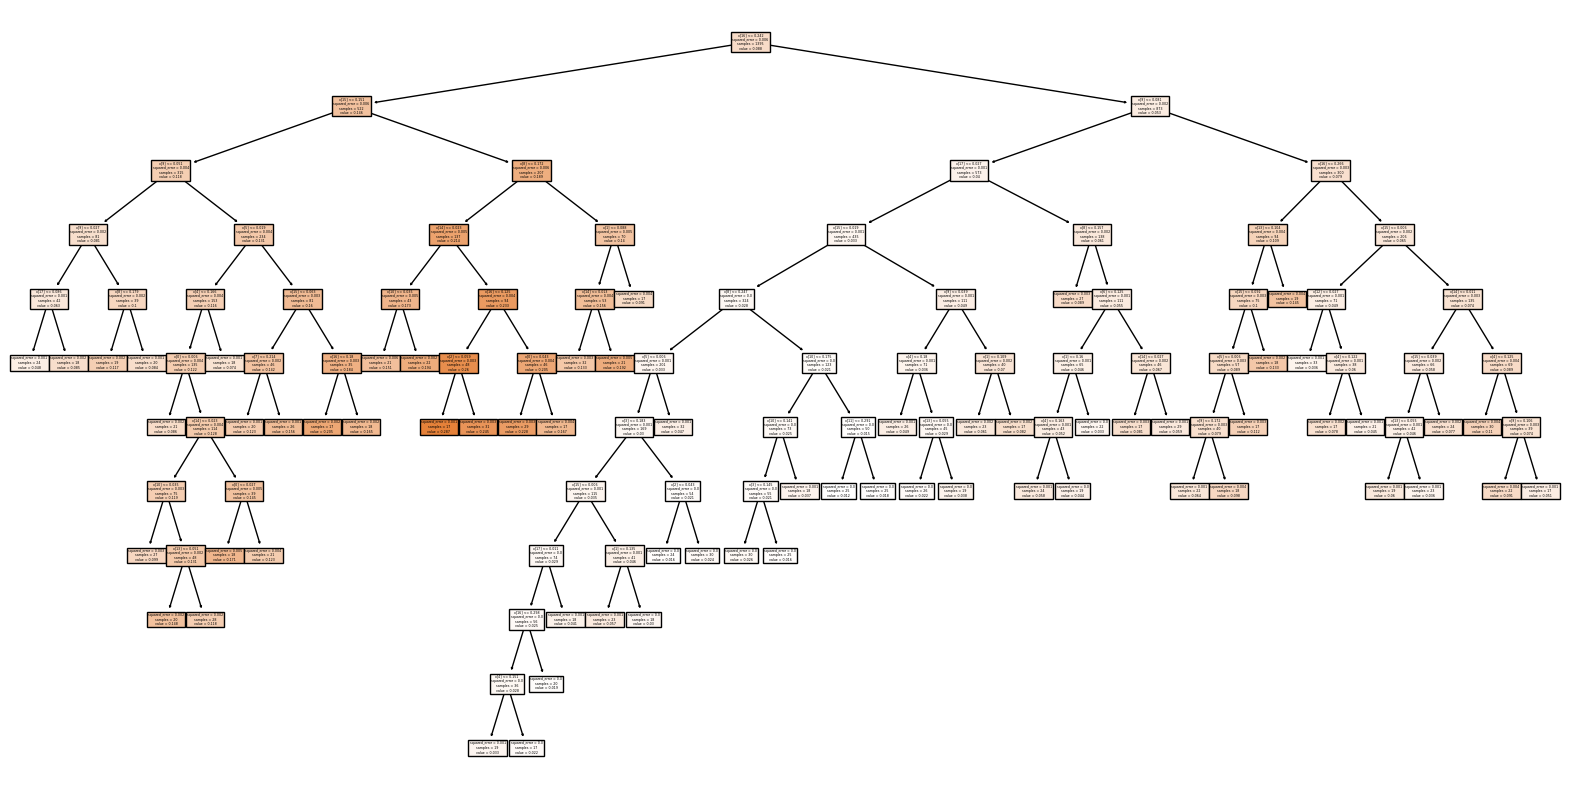

In [14]:
FiguraTree, SubPlot = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

plot_tree(DT_Regressor, filled=True, ax=SubPlot)
plt.show()

## Obtaining scores for Decision Tree model

In [15]:
MS2_E_DT = mean_squared_error(Y_test, Y_hat, squared=False)
MA_E_DT = mean_absolute_error(Y_test, Y_hat)
R2_DT = r2_score(Y_test, Y_hat)

print(f"{MS2_E_DT=} ")
print(f"{MA_E_DT=} ")
print(f"{R2_DT=} ")

%store MS2_E_DT
%store MA_E_DT
%store R2_DT

MS2_E_DT=0.047855755857513914 
MA_E_DT=0.03453288867077848 
R2_DT=0.5372865175545228 
Stored 'MS2_E_DT' (float64)
Stored 'MA_E_DT' (float64)
Stored 'R2_DT' (float64)


## Visualize Prediction-Error plot

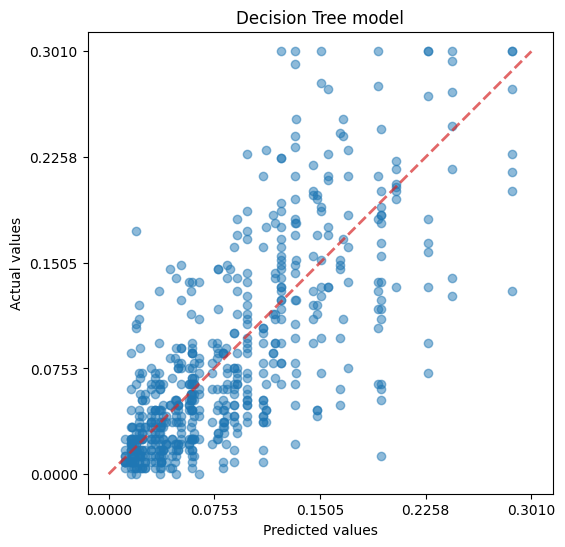

In [16]:

Figura_PredictedReal = plt.figure(1, figsize=(6,6))
Subplot = Figura_PredictedReal.add_subplot(111)
Subplot.set_title("Decision Tree model")

PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.5, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red", "linewidth":2.0},
                       ax = Subplot)

Figura_PredictedReal.savefig("../Resultados/ActualPredicho_DT.png", dpi=300)
plt.show()